In [86]:
import pandas as pd
import numpy as np
import os
os.chdir('/home/jovyan/work/src')
import sys
import init
import do_aperture
import logging

import importlib
importlib.reload(do_aperture)

%matplotlib inline
import matplotlib as plt
plt.style.use('seaborn')
pd.options.mode.chained_assignment = None
%reload_ext autoreload
%autoreload 2
os.chdir('/home/jovyan/work')
logging.getLogger().setLevel(logging.DEBUG)
logging.basicConfig(format="%(asctime)s %(levelname)s %(message)s")


Collect: collect = len(apertures), detectablestars, nrfiles, 2       dtype=float

In [3]:
logging.getLogger().setLevel(logging.INFO)
jd, fwhm, collect, apertures = do_aperture.gather_data(do_aperture.file_selector(init.matchedphotometrydir, 'match*.pht', init.aperture_find_percentage))


2019-02-28 10:08:04,607 INFO Apertures: (2.0, 2.558, 3.272, 4.186, 5.354, 6.849, 8.761, 11.206, 14.334, 18.335, 23.453, 30.0), nr of files: 45


0/45: ./current/matched_photometry/match000773.pht
	Date from header: 2457255.641712963 fwhm: 2.420923793610692
1/45: ./current/matched_photometry/match000420.pht
	Date from header: 2457247.6659027776 fwhm: 2.3297057598851905
2/45: ./current/matched_photometry/match000538.pht
	Date from header: 2457249.676458333 fwhm: 2.519089745084207
3/45: ./current/matched_photometry/match000641.pht
	Date from header: 2457253.651550926 fwhm: 2.3244343432618426
4/45: ./current/matched_photometry/match000349.pht
	Date from header: 2457245.7112268517 fwhm: 3.268702860527016
5/45: ./current/matched_photometry/match000356.pht
	Date from header: 2457245.724861111 fwhm: 2.556846238894181
6/45: ./current/matched_photometry/match000856.pht
	Date from header: 2457257.6453935187 fwhm: 2.5118550433581746
7/45: ./current/matched_photometry/match000428.pht
	Date from header: 2457247.6815277776 fwhm: 2.3403713913708306
8/45: ./current/matched_photometry/match000001.pht
	Date from header: 2457236.6630208334 fwhm: 2

In [4]:
_, _, _, stddevs, counts = do_aperture.process(jd, fwhm, collect, apertures)

/opt/conda/lib/python3.6/site-packages/scipy/stats/mstats_basic.py:2073: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  mm = (ma.minimum.reduce(a), ma.maximum.reduce(a))
/opt/conda/lib/python3.6/site-packages/scipy/stats/mstats_basic.py:2073: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  mm = (ma.minimum.reduce(a), ma.maximum.reduce(a))
2019-02-28 10:08:32,971 INFO Calculating stddevs...
Calculating stddevs:   0%|          | 0/12 [00:00<?, ?it/s]

DescribeResult(nobs=array([[5370, 5369],
       [6179, 6178],
       [5230, 5230],
       [   0,    0],
       [2606, 2606],
       [5910, 5908],
       [5008, 5007],
       [5936, 5936],
       [5959, 5956],
       [6557, 6557],
       [5874, 5874],
       [6149, 6148],
       [5499, 5499],
       [6313, 6312],
       [6986, 6985],
       [5589, 5589],
       [4913, 4913],
       [3453, 3452],
       [4409, 4409],
       [4298, 4298],
       [5335, 5335],
       [5711, 5709],
       [6283, 6282],
       [4408, 4408],
       [5026, 5026],
       [4927, 4924],
       [4587, 4584],
       [6275, 6274],
       [6037, 6036],
       [6004, 6003],
       [6239, 6239],
       [6261, 6259],
       [5952, 5951],
       [4400, 4399],
       [4941, 4940],
       [4465, 4463],
       [5896, 5896],
       [4228, 4227],
       [6272, 6269],
       [6088, 6087],
       [4593, 4593],
       [5228, 5228],
       [3692, 3692],
       [6368, 6368],
       [2687, 2687]]), minmax=(masked_array(data = 0.000

Calculating stddevs: 100%|██████████| 12/12 [01:14<00:00,  6.17s/it]
2019-02-28 10:09:47,795 INFO [ 0.0526313   0.12387286  0.13277226  0.15135412  0.13608994  0.1437659
  0.14584535  0.1452444   0.13874107  0.1422261   0.11593444  0.13772099
  0.13376948  0.16323428  0.14244727  0.09875878  0.15538497  0.10721719
  0.13838125  0.14338487]
2019-02-28 10:09:47,796 INFO Shape for stddevs: (12, 10000)
2019-02-28 10:09:47,797 INFO 1021


,0
0,0.000000
1,0.042477
2,0.053032
3,0.074120
4,2.045926


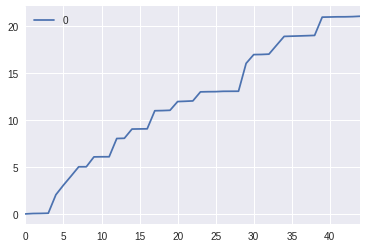

In [5]:
jdnorm = jd - jd.min()
dfjd = pd.DataFrame(sorted(jdnorm))
dfjd.plot()
dfjd.head()

,0,1,2
0,2.5,2.420924,0.374696
1,2.5,2.329706,0.329514
2,2.5,2.519090,0.370952
3,2.5,2.324434,0.392212
4,2.5,3.268703,0.569913


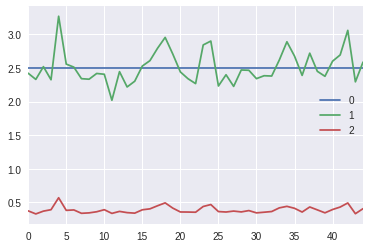

In [6]:
dffw = pd.DataFrame(fwhm)
dffw.plot()
dffw.head()

In [7]:
print(collect.shape)
names=['aperture','starref','file', 'data']
index = pd.MultiIndex.from_product([range(s)for s in collect.shape], names=names)
df = pd.DataFrame({'A': collect.flatten()}, index=index)['A']

(12, 10000, 45, 2)


In [8]:
df

aperture  starref  file  data
0         0        0     0       10.486069
                         1        0.000910
                   1     0       10.488583
                         1        0.000911
                   2     0       10.498388
                         1        0.000916
                   3     0             inf
                         1             inf
                   4     0       10.523699
                         1        0.000929
                   5     0       10.494880
                         1        0.000916
                   6     0       10.474784
                         1        0.000907
                   7     0       10.499578
                         1        0.000916
                   8     0       10.493881
                         1        0.000925
                   9     0       10.525811
                         1        0.000928
                   10    0       10.456545
                         1        0.000899
                   11   

In [9]:
dfu = df.unstack()

(5400000, 2)


2.3113163603773287e-05

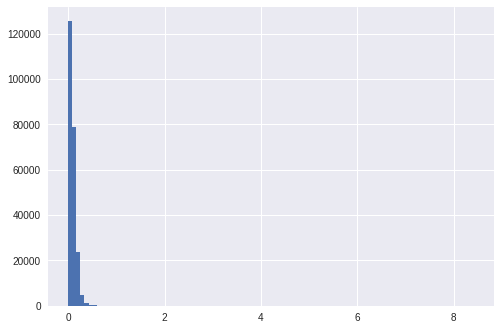

In [70]:
pd.set_option('use_inf_as_na', True)
print(dfu.shape)
errors = dfu[1][:][0]
mags = dfu[0][:][0]
errors.hist(bins=100)
errors[0].std()
# mags.hist(bins=20, subplots=True, layout=(1,2))
#mags.iloc[:,0].hist(bins=100)

In [11]:
dfst = pd.DataFrame(stddevs)

[autoreload of do_aperture failed: Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "/opt/conda/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 376, in superreload
    module = reload(module)
  File "/opt/conda/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/opt/conda/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 600, in _exec
AttributeError: 'NoneType' object has no attribute 'name'
]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2bf4fbc88>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe2bf35d080>]], dtype=object)

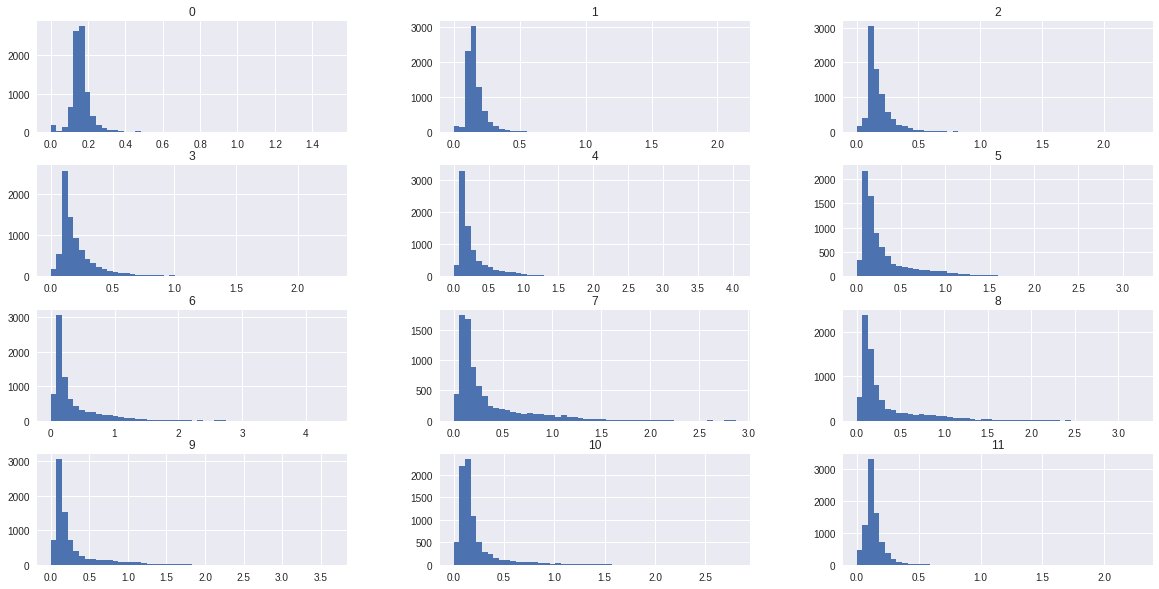

In [17]:

dfst.T.hist(bins=50, figsize=(20,10))
#dfst.T.mean()

In [87]:
logging.getLogger().setLevel(logging.INFO)
result = do_aperture.select_aperture_and_compstars(jd, fwhm, collect, apertures, stddevs, counts)
print(result[6])

2019-02-28 11:39:16,411 INFO FWHM median: 2.444729528101057, multiplied: 4.278276674176849, aperture chosen is: 4.186
2019-02-28 11:39:16,412 INFO Before selection on counts: 10000
2019-02-28 11:39:16,413 INFO counts threshold 79.2
2019-02-28 11:39:16,414 INFO Count mask: [False False False ...,  True  True  True]
2019-02-28 11:39:16,415 INFO After selection on counts: 7189
2019-02-28 11:39:16,416 INFO Masked std: [0.0994024069240884 0.084647936583065 0.08743108095297836 ..., -- -- --]
2019-02-28 11:39:16,417 INFO masked std len: 2811
2019-02-28 11:39:16,419 INFO compstars: [ 545  615  663  256 1147  250  214  719   40  269], len: 10
2019-02-28 11:39:16,421 INFO Compstars_0 with minimum stdev in the chosen aperture: [ 545  615  663  256 1147  250  214  719   40  269]
2019-02-28 11:39:16,423 INFO Compstars stddev: [ 0.07321582  0.0732741   0.07784363  0.0778955   0.07962774  0.07971375
  0.08041771  0.08080639  0.08115052  0.08119712]
2019-02-28 11:39:16,424 INFO Compstars counts: [ 82.

[546, 616, 664, 257, 1148, 251, 215, 720, 41, 270]


In [84]:
def doit():
    apertureidx = do_aperture.select_aperture(fwhm, apertures)
    selectedcounts = counts[apertureidx]
    # winners = np.argwhere(np.amax(selectedcounts)).flatten()
    logging.info(f"Before selection on counts: {len(selectedcounts)}")
    logging.info(f"counts threshold {np.max(selectedcounts)*0.9}") 
    count_mask = selectedcounts < np.max(selectedcounts)*0.9
    logging.info(f"Count mask: {count_mask}") 
    logging.info(f"After selection on counts: {np.sum(count_mask)}")
#    logging.info(f"Counts: {sorted(selectedcounts)}")

    masked_std = np.ma.masked_array(stddevs[apertureidx], count_mask)
    logging.info(f"Masked std: {masked_std}")
    logging.info(f"masked std len: {masked_std.count()}")
    
    nrtopstars = min(10, len(masked_std))
    compstars_0 = masked_std.argsort(fill_value=99999)[:nrtopstars]
    logging.info(f"compstars: {compstars_0}, len: {len(compstars_0)}")

    #compstar_0 = np.argmin(stddevs[apertureidx], axis=0)
    logging.info(f"Compstars_0 with minimum stdev in the chosen aperture: {compstars_0}")
    logging.info(f"Compstars stddev: {stddevs[apertureidx][compstars_0]}")
    logging.info(f"Compstars counts: {selectedcounts[compstars_0]}")
    for star in compstars_0:
        logging.info(f"Error for compstar_0:{star} is \t {errors[star].median()}")
    return (compstars_0+1).tolist()
doit()

2019-02-28 11:31:59,923 INFO FWHM median: 2.444729528101057, multiplied: 4.278276674176849, aperture chosen is: 4.186
2019-02-28 11:31:59,925 INFO Before selection on counts: 10000
2019-02-28 11:31:59,927 INFO counts threshold 79.2
2019-02-28 11:31:59,928 INFO Count mask: [False False False ...,  True  True  True]
2019-02-28 11:31:59,929 INFO After selection on counts: 7189
2019-02-28 11:31:59,931 INFO Masked std: [0.0994024069240884 0.084647936583065 0.08743108095297836 ..., -- -- --]
2019-02-28 11:31:59,933 INFO masked std len: 2811
2019-02-28 11:31:59,937 INFO compstars: [ 545  615  663  256 1147  250  214  719   40  269], len: 10
2019-02-28 11:31:59,939 INFO Compstars_0 with minimum stdev in the chosen aperture: [ 545  615  663  256 1147  250  214  719   40  269]
2019-02-28 11:31:59,940 INFO Compstars stddev: [ 0.07321582  0.0732741   0.07784363  0.0778955   0.07962774  0.07971375
  0.08041771  0.08080639  0.08115052  0.08119712]
2019-02-28 11:31:59,941 INFO Compstars counts: [ 82.

[546, 616, 664, 257, 1148, 251, 215, 720, 41, 270]

In [49]:
a = [1,3,5,9,8]
mask = [True, False, True, False, True]
ma = np.ma.masked_array(a, mask)
print(ma)
ma.min()

[-- 3 -- 9 --]


3